<a href="https://colab.research.google.com/github/YunlouTeng/Spotify-playlists-comparsion-viz/blob/main/data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import pandas as pd
import numpy as np
from scipy import stats
import base64
from sklearn.preprocessing import StandardScaler

In [55]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="8f2e19ede03a48398e8a41c5b77a015e",
                                               client_secret="e0d473dcf2f243fa9d9119639a57e4a2"))

In [56]:
def get_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    results = tracks    

    playlist_tracks_id = []
    playlist_tracks_titles = []
    playlist_tracks_artists = []
    playlist_tracks_first_artists = []
    playlist_tracks_first_release_date = []
    playlist_tracks_popularity = []

    for i in range(len(results)):
        print(i) # Counter
        if i == 0:
            playlist_tracks_id = results[i]['track']['id']
            playlist_tracks_titles = results[i]['track']['name']
            playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
            playlist_tracks_popularity = results[i]['track']['popularity']

            artist_list = []
            for artist in results[i]['track']['artists']:
                artist_list= artist['name']
            playlist_tracks_artists = artist_list

            features = sp.audio_features(playlist_tracks_id)
            features_df = pd.DataFrame(data=features, columns=features[0].keys())
            features_df['title'] = playlist_tracks_titles
            features_df['all_artists'] = playlist_tracks_artists
            features_df['popularity'] = playlist_tracks_popularity
            features_df['release_date'] = playlist_tracks_first_release_date
            features_df = features_df[['id', 'title', 'all_artists', 'popularity', 'release_date',
                                       'danceability', 'energy', 'key', 'loudness',
                                       'mode', 'acousticness', 'instrumentalness',
                                       'liveness', 'valence', 'tempo',
                                       'duration_ms', 'time_signature','speechiness']]
            continue
        else:
            try:
                playlist_tracks_id = results[i]['track']['id']
                playlist_tracks_titles = results[i]['track']['name']
                playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
                playlist_tracks_popularity = results[i]['track']['popularity']
                artist_list = []
                for artist in results[i]['track']['artists']:
                    artist_list= artist['name']
                playlist_tracks_artists = artist_list
                features = sp.audio_features(playlist_tracks_id)
                new_row = {'id':[playlist_tracks_id],
               'title':[playlist_tracks_titles],
               'all_artists':[playlist_tracks_artists],
               'popularity':[playlist_tracks_popularity],
               'release_date':[playlist_tracks_first_release_date],
               'danceability':[features[0]['danceability']],
               'energy':[features[0]['energy']],
               'key':[features[0]['key']],
               'loudness':[features[0]['loudness']],
               'mode':[features[0]['mode']],
               'acousticness':[features[0]['acousticness']],
               'instrumentalness':[features[0]['instrumentalness']],
               'liveness':[features[0]['liveness']],
               'valence':[features[0]['valence']],
               'tempo':[features[0]['tempo']],
               'duration_ms':[features[0]['duration_ms']],
               'time_signature':[features[0]['time_signature']],
               'speechiness':[features[0]['speechiness']]
               }

                dfs = [features_df, pd.DataFrame(new_row)]
                features_df = pd.concat(dfs, ignore_index = True)
            except:
                continue
                
    return features_df

In [57]:
df = get_tracks(username='Yunlou',playlist_id = '39PcxlfjCXr1j6pBFnl3yb')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [58]:
df2 = get_tracks(username='Spotify',playlist_id = '37i9dQZEVXbLRQDuF5jeBp')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [59]:
df3 = get_tracks(username='Spotify',playlist_id = '37i9dQZEVXbMnZEatlMSiu')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [10]:
df.head()

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,speechiness
0,3uRSGfI30pIW4efbKh4age,Estábamos Tan Bien,Daniela Spalla,58,2018-09-21,0.739,0.588,0,-6.696,1,0.51600,0.000000,0.1930,0.848,123.914,221333,4,0.0316
1,1dmi9lVthTKjuemmO8ucWm,Love Theory,Wonstein,62,2022-04-14,0.878,0.710,10,-5.127,1,0.36700,0.000000,0.0990,0.888,119.991,199920,4,0.0473
2,0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,Lil Nas X,85,2021-09-17,0.737,0.846,1,-4.510,0,0.00614,0.000000,0.0486,0.546,87.981,143901,4,0.2200
3,4cktbXiXOapiLBMprHFErI,Memories,Maroon 5,86,2021-06-11,0.775,0.327,11,-7.241,1,0.84100,0.000000,0.0821,0.595,91.050,189486,4,0.0557
4,0TtlEcywpBGifjTJqgSMI0,Why Baby Why,MyKey,33,2017-07-29,0.840,0.623,7,-7.066,1,0.24500,0.000002,0.0879,0.963,116.078,146500,4,0.0302


In [47]:
df2.head()

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,speechiness
0,0JXXNGljqupsJaZsgSbMZV,Sure Thing,Miguel,93,2010-11-26,0.684,0.607,11,-8.127,0,0.0267,0.000307,0.1910,0.498,81.001,195373,4,0.1000
1,78Sw5GDo6AlGwTwanjXbGh,Here With Me,d4vd,94,2022-09-22,0.574,0.469,4,-8.209,1,0.5340,0.000092,0.1280,0.288,132.023,242485,4,0.0254
2,3OHfY25tqY28d16oZczHc8,Kill Bill,SZA,97,2022-12-09,0.644,0.728,8,-5.750,1,0.0543,0.169000,0.1610,0.430,88.993,153947,4,0.0351
3,0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,100,2023-01-13,0.707,0.681,0,-4.325,1,0.0632,0.000005,0.0322,0.646,117.999,200455,4,0.0668
4,5Z2MiIZ5I3jJvvmeWMLbOQ,Escapism.,070 Shake,93,2022-10-12,0.538,0.742,2,-5.355,1,0.1380,0.000047,0.0934,0.250,96.107,272373,4,0.1140


In [60]:
df['p_danceability'] = df['danceability'].apply(lambda x: x*100)
df['p_energy'] = df['energy'].apply(lambda x: x*100)
df['p_tempo'] = df['tempo'].apply(lambda x: stats.percentileofscore(np.arange(40,251,step=1), x))
df['p_valence'] = df['valence'].apply(lambda x: x*100)
df['p_acousticness'] = df['acousticness'].apply(lambda x: x*100)
df['p_liveness'] = df['liveness'].apply(lambda x: x*100)
df['p_loudness'] = df['loudness'].apply(lambda x: stats.percentileofscore(np.arange(-60,0.0001,step=0.0001), x))
df['p_speechiness'] = df['speechiness'].apply(lambda x: x*100)

In [61]:
df2['p_danceability'] = df2['danceability'].apply(lambda x: x*100)
df2['p_energy'] = df2['energy'].apply(lambda x: x*100)
df2['p_tempo'] = df2['tempo'].apply(lambda x: stats.percentileofscore(np.arange(40,251,step=1), x))
df2['p_valence'] = df2['valence'].apply(lambda x: x*100)
df2['p_acousticness'] = df2['acousticness'].apply(lambda x: x*100)
df2['p_liveness'] = df2['liveness'].apply(lambda x: x*100)
df2['p_loudness'] = df2['loudness'].apply(lambda x: stats.percentileofscore(np.arange(-60,0.0001,step=0.0001), x))
df2['p_speechiness'] = df2['speechiness'].apply(lambda x: x*100)

In [62]:
df3['p_danceability'] = df3['danceability'].apply(lambda x: x*100)
df3['p_energy'] = df3['energy'].apply(lambda x: x*100)
df3['p_tempo'] = df3['tempo'].apply(lambda x: stats.percentileofscore(np.arange(40,251,step=1), x))
df3['p_valence'] = df3['valence'].apply(lambda x: x*100)
df3['p_acousticness'] = df3['acousticness'].apply(lambda x: x*100)
df3['p_liveness'] = df3['liveness'].apply(lambda x: x*100)
df3['p_loudness'] = df3['loudness'].apply(lambda x: stats.percentileofscore(np.arange(-60,0.0001,step=0.0001), x))
df3['p_speechiness'] = df3['speechiness'].apply(lambda x: x*100)

In [63]:
df['playlist'] = "My Playlist"
df2['playlist'] = 'TOP50 USA'
df3['playlist'] = 'TOP50 TAIWAN'

In [64]:
df_final = pd.concat([df,df2,df3], ignore_index = True)

In [73]:

dff = df[['danceability','energy','tempo','valence','acousticness','liveness','loudness','speechiness']]

scaler = StandardScaler()
scaler.fit(dff)
scaled = scaler.fit_transform(dff)
scaled_df = pd.DataFrame(scaled, columns=dff.columns)

In [76]:
scaled_df.head()

,danceability,energy,tempo,valence,acousticness,liveness,loudness,speechiness
0,0.760797,0.061632,0.093682,1.472476,0.551720,0.160196,0.091461,-0.666352
1,1.742760,0.687770,-0.042283,1.643907,0.069457,-0.570322,0.763998,-0.414270
2,0.746668,1.385760,-1.151703,0.178171,-1.098524,-0.962003,1.028469,2.358629
3,1.015118,-1.277893,-1.045336,0.388174,1.603634,-0.701659,-0.142149,-0.279399
4,1.474309,0.241262,-0.177902,1.965341,-0.325415,-0.656585,-0.067137,-0.688831


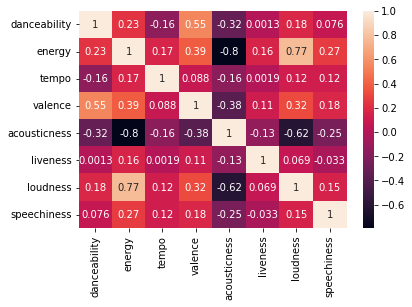

In [78]:
sns.heatmap(scaled_df.corr(), annot=True)

In [65]:
df_final.to_excel('/content/drive/MyDrive/data_science_project/spotify analysis/spotify_v3.xlsx')